In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/ResaleFlatPricesBasedonApprovalDate19901999 (1).csv')
df2 = pd.read_csv('/content/drive/MyDrive/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
df3 = pd.read_csv('/content/drive/MyDrive/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')
df4 = pd.read_csv('/content/drive/MyDrive/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')
df5 = pd.read_csv('/content/drive/MyDrive/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')
file = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
file.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [ ]:
file['remaining_lease'].replace('nan', np.nan, inplace=True)
file.isnull().sum()


month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [ ]:
del file['remaining_lease']

In [ ]:
file.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [ ]:
file.drop_duplicates(inplace=True)
file.shape

(929099, 10)

In [ ]:
file.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
dtype: object

In [ ]:
def convert_storey_range(storey_range):
    lower, upper = map(int, storey_range.lower().split(' to '))
    return (lower + upper) / 2

file['storey_range_numeric'] = file['storey_range'].apply(convert_storey_range)

In [ ]:
if 'block' in file.columns:
    file['block_numeric'] = file['block'].str.extract('(\d+)').astype(int)
    file.drop(columns=['block'], inplace=True)


In [ ]:
file['year'] = file['month'].str[:4].astype(int)
file['month_numeric'] = file['month'].str[5:7].astype(int)
file['year_month'] = file['year'] + file['month_numeric'] / 100


In [ ]:
col = ['storey_range','remaining_lease','year','month','flat_model','month_numeric']
file.drop(columns=[c for c in col if c in file.columns], inplace=True)



In [ ]:
file['flat_type'] = file['flat_type'].replace('MULTI GENERATION', 'MULTI-GENERATION')



In [ ]:
file.dtypes

town                     object
flat_type                object
street_name              object
floor_area_sqm          float64
lease_commence_date       int64
resale_price            float64
storey_range_numeric    float64
block_numeric             int64
year_month              float64
dtype: object

In [ ]:
for feature in ['floor_area_sqm','storey_range_numeric','block_numeric','resale_price']:
        iqr = file[feature].quantile(0.75) - file[feature].quantile(0.25)
        upper_threshold = file[feature].quantile(0.75) + (1.5 * iqr)
        lower_threshold = file[feature].quantile(0.25) - (1.5 * iqr)
        file[feature] = file[feature].clip(lower_threshold, upper_threshold)

In [ ]:
file

,town,flat_type,street_name,floor_area_sqm,lease_commence_date,resale_price,storey_range_numeric,block_numeric,year_month
0,ANG MO KIO,1 ROOM,ANG MO KIO AVE 1,31.0,1977,9000.0,11.0,309,1990.01
1,ANG MO KIO,1 ROOM,ANG MO KIO AVE 1,31.0,1977,6000.0,5.0,309,1990.01
2,ANG MO KIO,1 ROOM,ANG MO KIO AVE 1,31.0,1977,8000.0,11.0,309,1990.01
3,ANG MO KIO,1 ROOM,ANG MO KIO AVE 1,31.0,1977,6000.0,8.0,309,1990.01
4,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,73.0,1976,47200.0,5.0,216,1990.01
...,...,...,...,...,...,...,...,...,...
931066,YISHUN,EXECUTIVE,YISHUN RING RD,146.0,1988,759000.0,5.0,352,2024.07
931067,YISHUN,EXECUTIVE,YISHUN RING RD,145.0,1988,759000.0,11.0,359,2024.07
931068,YISHUN,EXECUTIVE,YISHUN ST 22,146.0,1985,759000.0,2.0,277,2024.07
931069,YISHUN,EXECUTIVE,YISHUN ST 22,146.0,1985,759000.0,5.0,277,2024.07


In [ ]:
file['flat_type'] = file['flat_type'].map({'MULTI-GENERATION':7,'EXECUTIVE':6,'5 ROOM':5,'4 ROOM':4,'3 ROOM':2,'2 ROOM':1, '1 ROOM': 0})

floor_area_sqm
0.3307522069234893


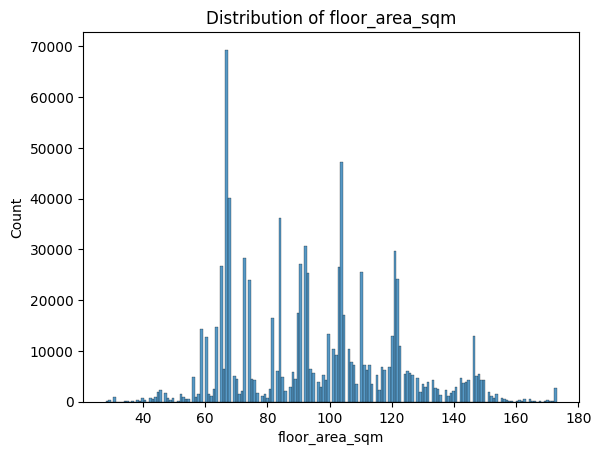

flat_type
-0.15339393303569243


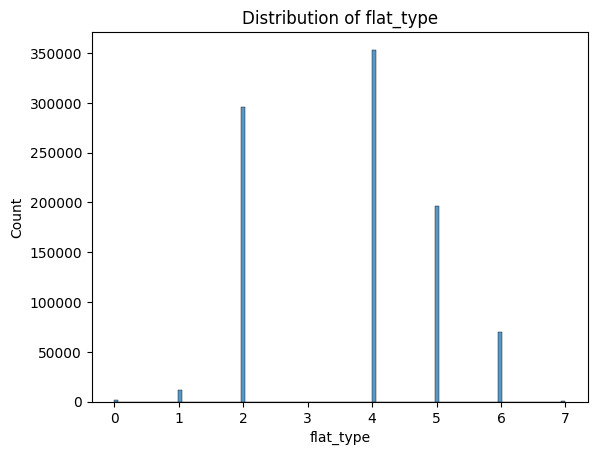

lease_commence_date
0.6516806790047479


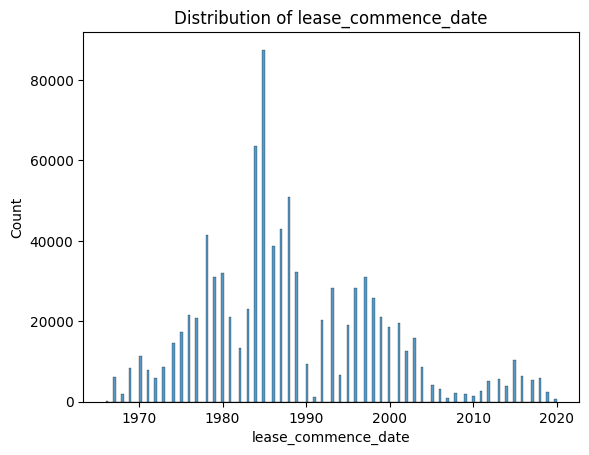

year_month
0.2932689310733196


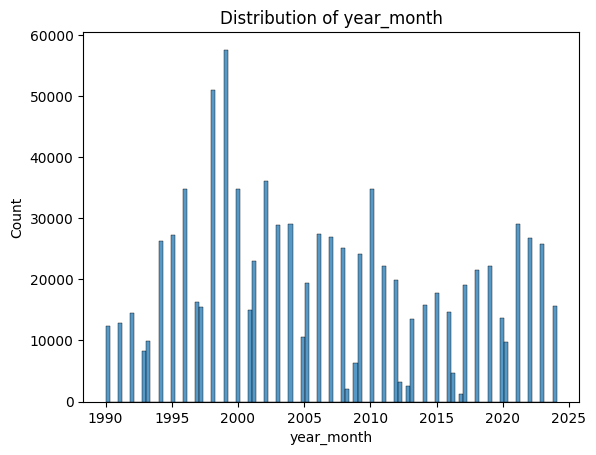

block_numeric
0.5357861464797365


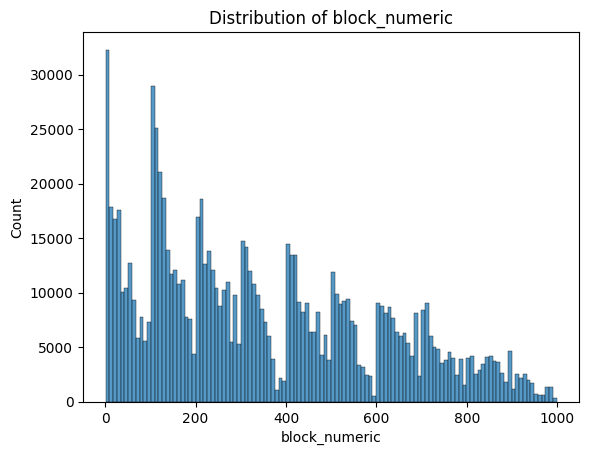

storey_range_numeric
0.7019456063835857


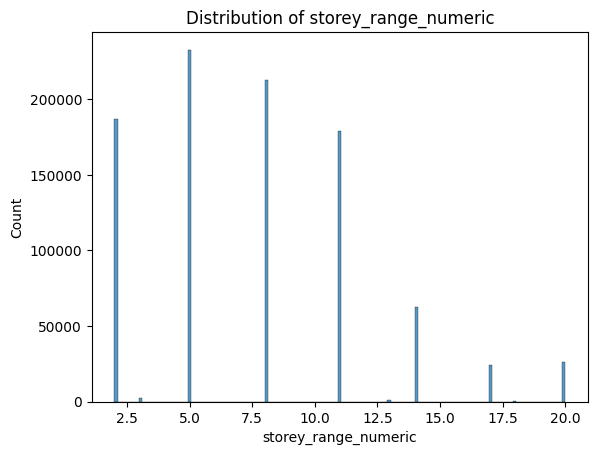

resale_price
0.6521779531017149


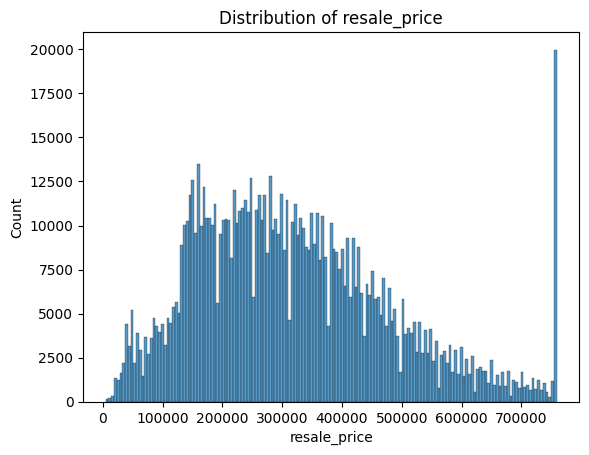

In [ ]:
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt

columnames = ['floor_area_sqm','flat_type','lease_commence_date','year_month','block_numeric','storey_range_numeric','resale_price']
for col in columnames:
    print(col)
    non_nan_values = file[col].dropna()
    print(skew(non_nan_values))

    plt.figure()
    sns.histplot(file[col])
    plt.title(f'Distribution of {col}')
    plt.show()

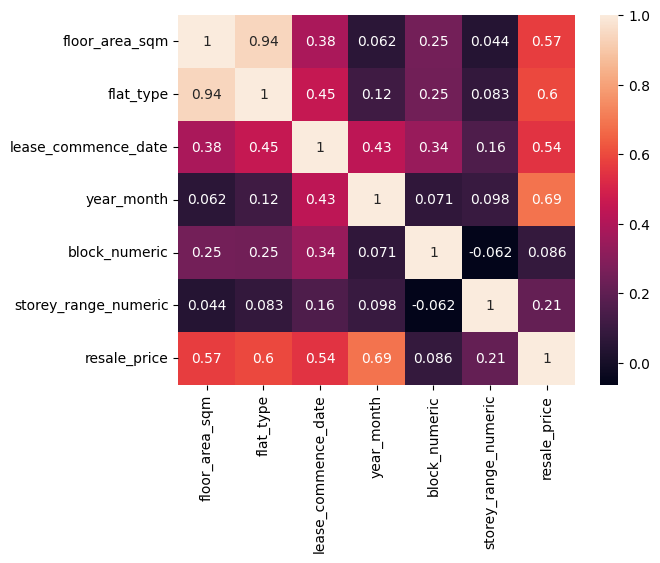

In [ ]:
sns.heatmap(file[['floor_area_sqm','flat_type','lease_commence_date','year_month','block_numeric','storey_range_numeric','resale_price']].corr(), annot=True)
plt.show()

###EDA AND ENCODING###

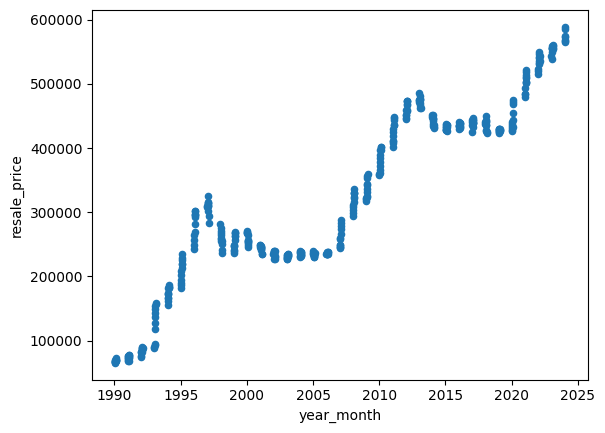

In [ ]:
mean_prices = file.groupby('year_month')['resale_price'].mean().reset_index()
mean_prices.plot(x='year_month', y='resale_price', kind='scatter')
plt.show()

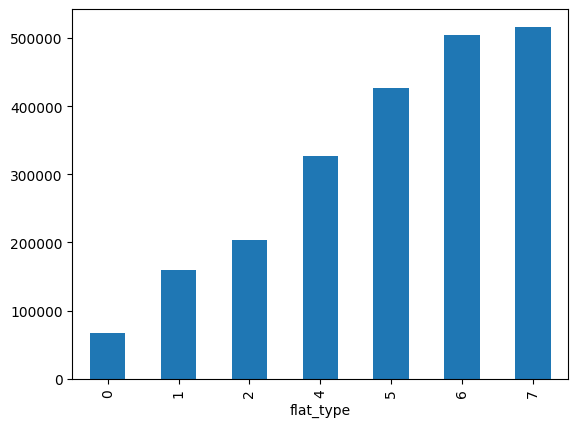

In [ ]:
file.groupby('flat_type')['resale_price'].mean().plot(kind='bar')
plt.show()

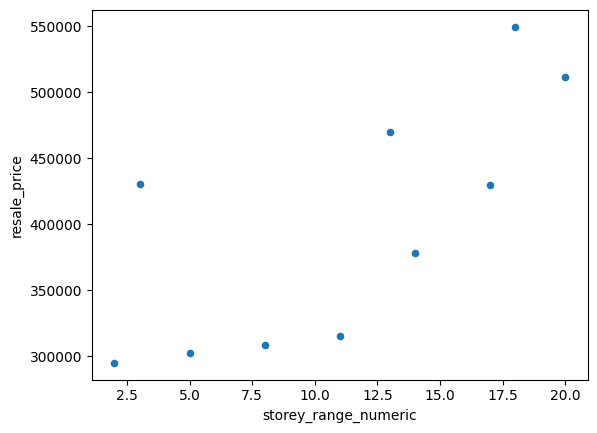

In [ ]:
mean_prices = file.groupby('storey_range_numeric')['resale_price'].mean().reset_index()
mean_prices.plot(x='storey_range_numeric', y='resale_price', kind='scatter')
plt.show()

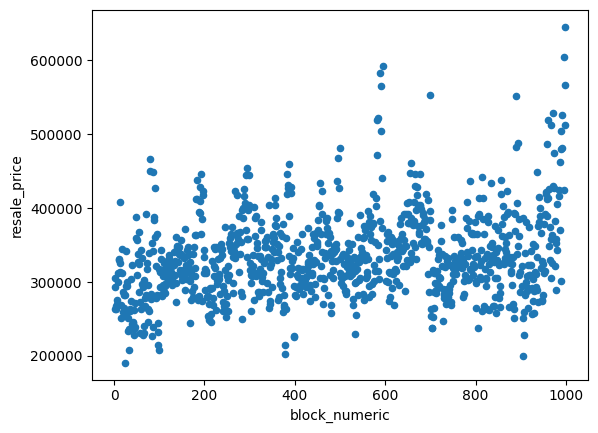

In [ ]:
mean_prices = file.groupby('block_numeric')['resale_price'].mean().reset_index()
mean_prices.plot(x='block_numeric', y='resale_price', kind='scatter')
plt.show()

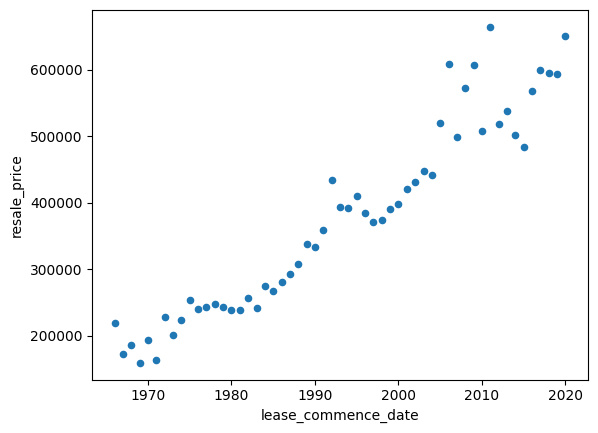

In [ ]:
mean_prices = file.groupby('lease_commence_date')['resale_price'].mean().reset_index()
mean_prices.plot(x='lease_commence_date', y='resale_price', kind='scatter')
plt.show()

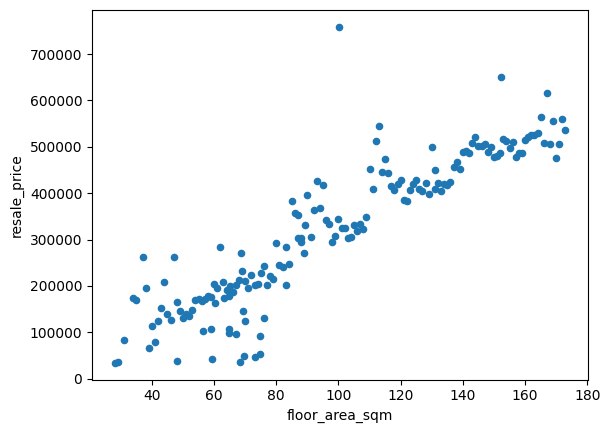

In [ ]:
mean_prices = file.groupby('floor_area_sqm')['resale_price'].mean().reset_index()
mean_prices.plot(x='floor_area_sqm', y='resale_price', kind='scatter')
plt.show()

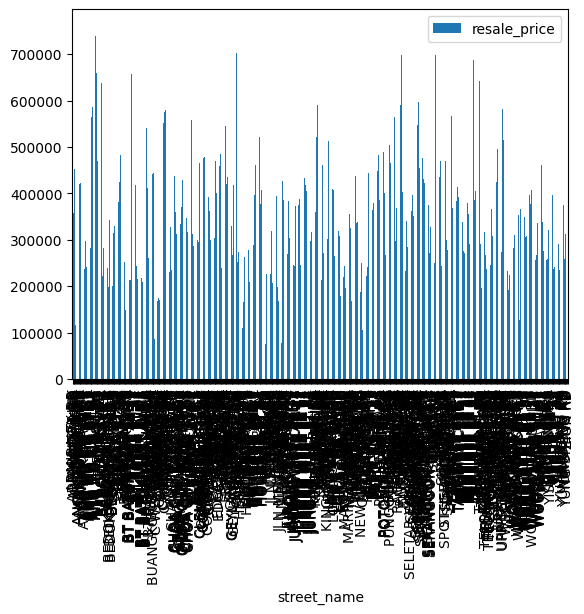

In [ ]:
mean_prices = file.groupby('street_name')['resale_price'].mean().reset_index()
mean_prices.plot(x='street_name', y='resale_price', kind='bar')
plt.show()

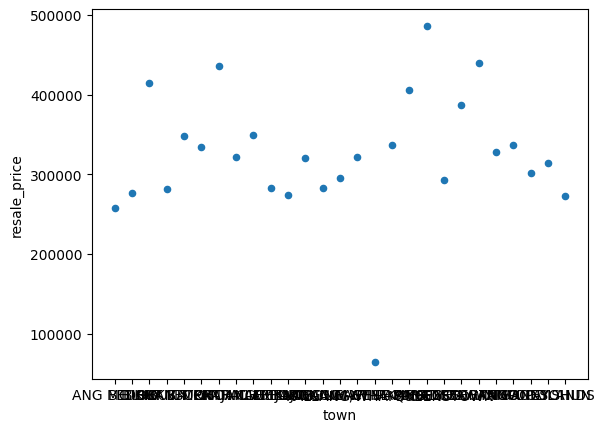

In [ ]:
mean_prices = file.groupby('town')['resale_price'].mean().reset_index()
mean_prices.plot(x='town', y='resale_price', kind='scatter')
plt.show()

In [ ]:
file

,town,flat_type,street_name,floor_area_sqm,lease_commence_date,resale_price,storey_range_numeric,block_numeric,year_month
0,ANG MO KIO,0,ANG MO KIO AVE 1,31.0,1977,9000.0,11.0,309,1990.01
1,ANG MO KIO,0,ANG MO KIO AVE 1,31.0,1977,6000.0,5.0,309,1990.01
2,ANG MO KIO,0,ANG MO KIO AVE 1,31.0,1977,8000.0,11.0,309,1990.01
3,ANG MO KIO,0,ANG MO KIO AVE 1,31.0,1977,6000.0,8.0,309,1990.01
4,ANG MO KIO,2,ANG MO KIO AVE 1,73.0,1976,47200.0,5.0,216,1990.01
...,...,...,...,...,...,...,...,...,...
931066,YISHUN,6,YISHUN RING RD,146.0,1988,759000.0,5.0,352,2024.07
931067,YISHUN,6,YISHUN RING RD,145.0,1988,759000.0,11.0,359,2024.07
931068,YISHUN,6,YISHUN ST 22,146.0,1985,759000.0,2.0,277,2024.07
931069,YISHUN,6,YISHUN ST 22,146.0,1985,759000.0,5.0,277,2024.07


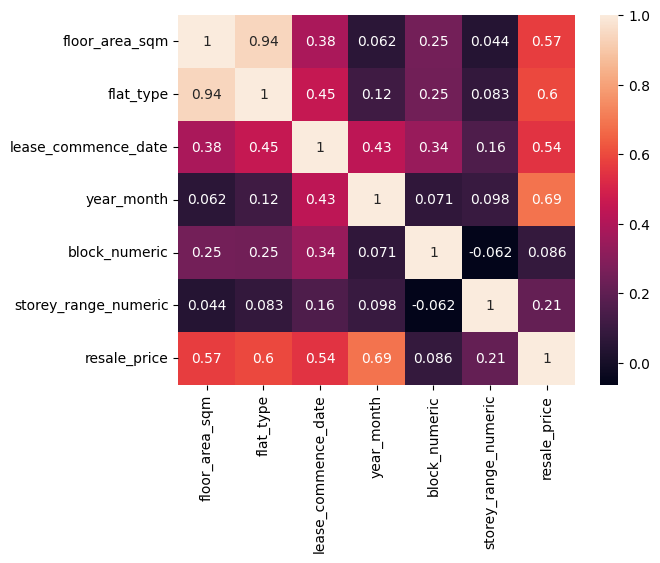

In [ ]:
sns.heatmap(file[['floor_area_sqm','flat_type','lease_commence_date','year_month','block_numeric','storey_range_numeric','resale_price']].corr(), annot=True)
plt.show()

###SPLIT###

In [ ]:
from sklearn.model_selection import train_test_split

X = file[['floor_area_sqm','flat_type','lease_commence_date','year_month','block_numeric','storey_range_numeric']]
y = file['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)
X_train.shape, X_test.shape

((696824, 6), (232275, 6))

# Scaling - Not mandatory

In [ ]:
# linear regression
# Decision Tree
# Random Forest
# XG Boost

# Model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print(f"R2 SCORE : {model.score(X_test, y_test)}")

R2 SCORE : 0.7842355616901996


#DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

for depth in [17,18,19,20,21,22,23,24,25,26]:
   model = DecisionTreeRegressor(max_depth = depth)
   model.fit(X_train, y_train)
   train_score = model.score(X_train, y_train)
   cross_val = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
   print(f"Depth - {depth}, TrainScore: {train_score}, Cross-ValScore: {cross_val}")

Depth - 17, TrainScore: 0.9609765226527258, Cross-ValScore: 0.9450550468742561
Depth - 18, TrainScore: 0.9665644832834064, Cross-ValScore: 0.946930587878296
Depth - 19, TrainScore: 0.9718312419083336, Cross-ValScore: 0.9482380630166443
Depth - 20, TrainScore: 0.976815378006516, Cross-ValScore: 0.9490861799375967
Depth - 21, TrainScore: 0.9812835870053898, Cross-ValScore: 0.9495055689350484
Depth - 22, TrainScore: 0.9851006873470863, Cross-ValScore: 0.9496089373172527
Depth - 23, TrainScore: 0.9883520812994894, Cross-ValScore: 0.9493533534843175
Depth - 24, TrainScore: 0.9910721459153752, Cross-ValScore: 0.9492028536166343
Depth - 25, TrainScore: 0.9932905169901218, Cross-ValScore: 0.9486253176046852
Depth - 26, TrainScore: 0.9950293578791138, Cross-ValScore: 0.9481114290677368


In [ ]:
model = DecisionTreeRegressor(max_depth = 22)

model.fit(X_train, y_train)

print(f"R2 SCORE : {model.score(X_test, y_test)}")

R2 SCORE : 0.9521135666889373


#RandomForestRegressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth = 2, max_features = "sqrt")

for n in [10, 20, 50, 100, 200, 500,1000]:
  model = RandomForestRegressor(n_estimators = n, max_depth = 3, max_features = "sqrt")
  cross_score = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"N: {n}, Cross-Val Score: {cross_score}")

N: 10, Cross-Val Score: 0.7415346780895142
N: 20, Cross-Val Score: 0.7296239250310911
N: 50, Cross-Val Score: 0.7444796979280419
N: 100, Cross-Val Score: 0.7472037529176352
N: 200, Cross-Val Score: 0.7480824354621245
N: 500, Cross-Val Score: 0.7480431121891749
N: 1000, Cross-Val Score: 0.7482879360950563


In [38]:
model = RandomForestRegressor(n_estimators = 20, max_depth = 3, max_features = "sqrt")
model.fit(X_train, y_train)
print(f"R2 SCORE : {model.score(X_test, y_test)}")

R2 SCORE : 0.7273418887404592


## XGBoost

In [39]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

for lamb in [0.019, 0.02, 0.05, 0.1, 0.2, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
  model = XGBRegressor(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0.019, Cross-Val Score: 0.8834446542017929
Lambda: 0.02, Cross-Val Score: 0.8886320101390085
Lambda: 0.05, Cross-Val Score: 0.9274062234545388
Lambda: 0.1, Cross-Val Score: 0.9396558640666914
Lambda: 0.2, Cross-Val Score: 0.9527236392462219
Lambda: 0.5, Cross-Val Score: 0.9631961486388818
Lambda: 0.6, Cross-Val Score: 0.964042116237968
Lambda: 0.7, Cross-Val Score: 0.9644763280056905
Lambda: 0.8, Cross-Val Score: 0.9644568285310084
Lambda: 0.9, Cross-Val Score: 0.9646054221217619
Lambda: 1, Cross-Val Score: 0.9633663217255654


In [40]:
model = XGBRegressor(learning_rate = 0.9)
model.fit(X_train, y_train)
print(f"R2 SCORE : {model.score(X_test, y_test)}")

R2 SCORE : 0.9640814478483251
